In [1]:
from pathlib import Path
import os
from scipy.io import savemat
#import h5py
import mat73
#from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

202

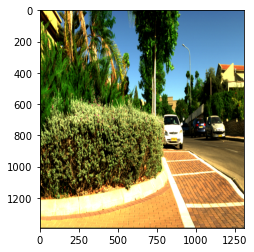

In [5]:
p= Path("E:/Documentos/Dataset")
dirs = os.listdir(p)
dirg="E:/Documentos/Dataset/"
imagenes=mat73.loadmat(dirg+dirs[70]).get('rgb')
imgplot = plt.imshow(imagenes)
len(dirs)
#type(imagenes)
#imagenes.save('my.png')
#imagenes.show()

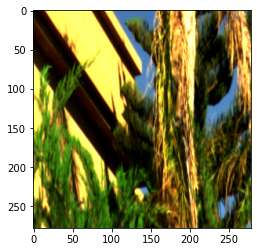

In [6]:
ctimg=imagenes[:278,:278,:]
ctimg.shape
ctplot = plt.imshow(ctimg)

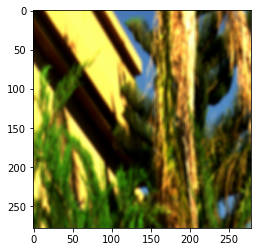

In [7]:
bluimg=cv2.GaussianBlur(ctimg,(5,5),3)#seleccion de permetros 
bluimg.shape
bluplot = plt.imshow(bluimg)

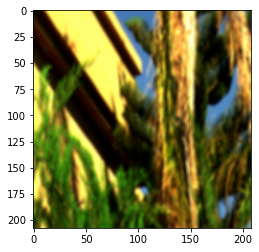

In [8]:
frm=bluimg.shape
val=int(frm[0]-(frm[0]*0.25))
rdimg=cv2.resize(bluimg, dsize=(val, val), interpolation=cv2.INTER_LINEAR)#escoger el interpolador 
rdimg.shape
rdplot = plt.imshow(rdimg)

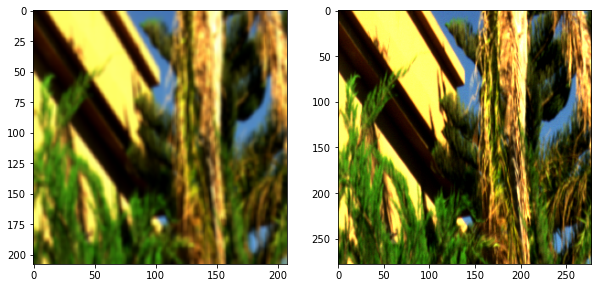

In [9]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(rdimg)
fig.add_subplot(1, 2, 2)
plt.imshow(ctimg)


In [74]:
svfile={'lwres':rdimg}
savemat('test.mat',svfile)